Can you provide the following monthly forwards please (for each of the ERCOT regions) for every combination of as-of and term date?:

As-of dates: 2019-09-01, 2019-10-01, 2019-11-01, 2019-12-01, 2020-01-01, 2020-02-01, 2020-03-01, 2020-04-01, 2020-05-01, 2020-06-01, 2020-07-01

Term dates: 2020-07-01, 2020-08-01 …  the first of each of the months through 2021-06-01

 
 
## two

As-of dates: April 1 – today

Term dates: July 2022-June 2032

 

And/or is there any way you could quickly aggregate up to an annual (with a year defined as July-June) ATC price (i.e. take the average of all the monthly ATC prices within a year) and look at the same dates (but predicting the annual ATC price) instead of the monthly on/off peak?




In [22]:
import pandas as pd


In [23]:
rth = pd.read_csv('/Users/jiyoojeong/desktop/c/nephila/renewables/realtime_forwards_ercot.csv')
h = pd.read_csv('/Users/jiyoojeong/desktop/c/nephila/renewables/ercot_all_ATC2.csv')
rth['AsOfDate'] = pd.to_datetime(rth['AsOfDate'])
rth['Term'] = pd.to_datetime(rth['Term'])
h['AsOfDate'] = pd.to_datetime(h['AsOfDate'])
h['Term'] = pd.to_datetime(h['Term'])

In [27]:
asofdates1 = ['2019-09-01','2020-08-01']

terms1 = ['2020-07-01', '2021-06-30'] # through

asofdates2 = ['2020-04-01', '2020-07-01'] #through
terms2 = ['07-01-2022', '06-30-2032']



In [28]:
h2= h[(h['AsOfDate']>=asofdates1[0]) & (h['AsOfDate']<=asofdates1[1]) & (h['Term'] >= terms1[0]) & (h['Term']<=terms1[1])]#['Peak'].value_counts()


In [29]:
h3= h[(h['AsOfDate']>=asofdates2[0]) & (h['AsOfDate']<=asofdates2[1]) & (h['Term'] >= terms2[0]) & (h['Term']<=terms2[1])]#['Peak'].value_counts()


In [30]:
h2['asofmonth'] = h2['AsOfDate'].dt.month
h3['asofmonth'] = h3['AsOfDate'].dt.month

<ipython-input-30-9b1a4569de0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2['asofmonth'] = h2['AsOfDate'].dt.month
<ipython-input-30-9b1a4569de0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h3['asofmonth'] = h3['AsOfDate'].dt.month


In [31]:
import matplotlib.pyplot as plt

(array([18353., 18367., 18383., 18397., 18414., 18428., 18444.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

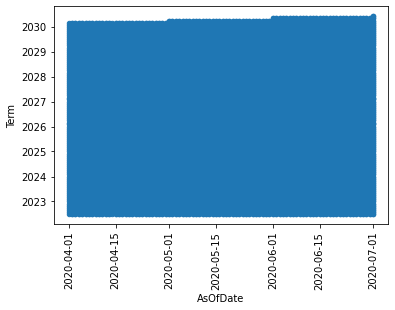

In [33]:
h3.plot('AsOfDate', 'Term', 'scatter')
plt.xticks(rotation=90)

In [34]:
h2.to_csv('Ercot_asof09012019to07012020.csv')
h3.to_csv('Ercot_asof04012020tolatest.csv')